### L_29 HLS Color Threshold

#### My Solution

In [6]:
%matplotlib inline

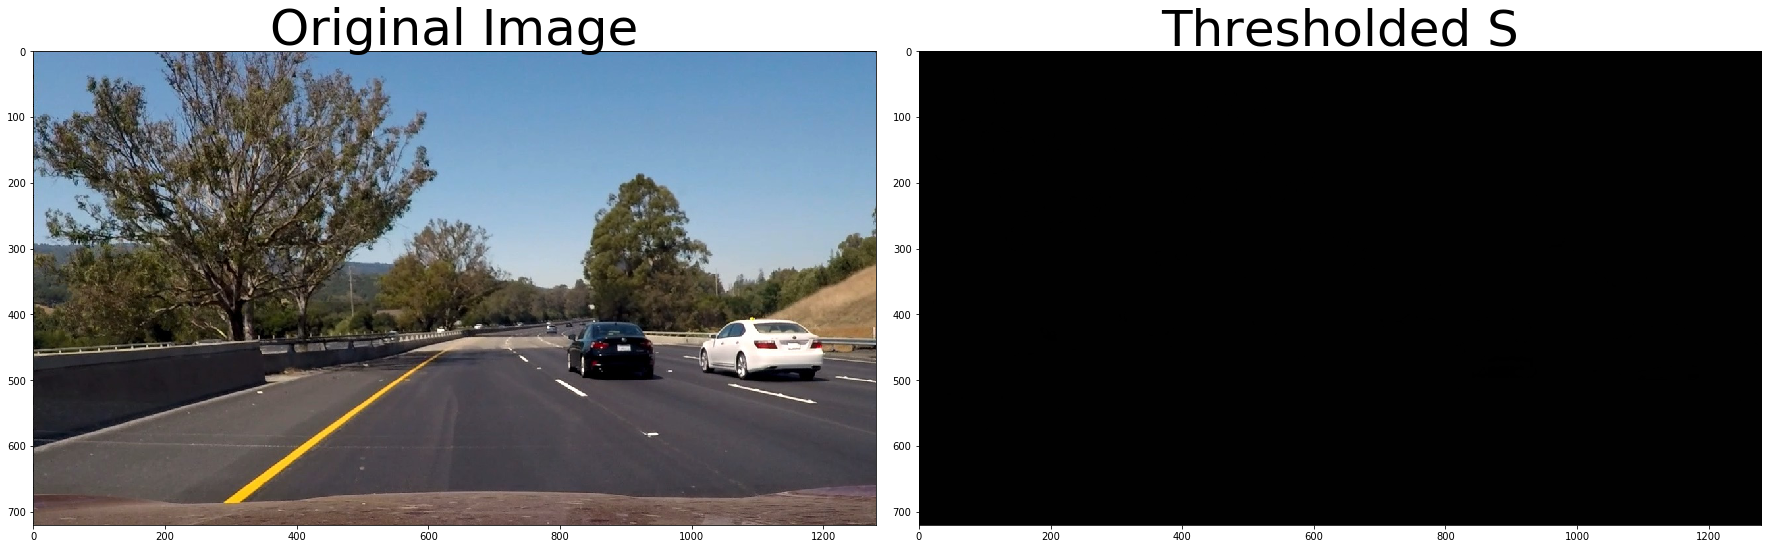

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)

def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    S = hls[:,:,2]
    
    # 2) Apply a threshold to the S channel
    binary_output = np.zeros_like(img)
    binary_output[ (S > thresh[0]) & (S <= thresh[1]) ] = 1
    
    # 3) Return a binary image of threshold result
    return binary_output
    
hls_binary = hls_select(image, thresh=(0, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)

plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### L_29 Quiz Instructions

#### HLS Color Threshold

In this exercise, you can try applying a color threshold in the HLS color space.  
If you have any problems with the implementation, please refer to the previous video and instructor notes.  

Your task here is to write a function that takes in an image and threshold values and returns a binary output from applying the threshold to the **S-channel**.  
Apply your thresholds as you did for gradients, but this time   
use an **exclusive (`>`) lower bound** and an **inclusive upper bound** (`<=`).  

<img src="l29-hls-binary.jpg" />


### L_29 start file

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

# Read in an image, you can also try test1.jpg or test4.jpg
image = mpimg.imread('test6.jpg') 

# Define a function that thresholds the S-channel of HLS
# Use exclusive lower bound (>) and inclusive upper (<=)
def hls_select(img, thresh=(0, 255)):
    # 1) Convert to HLS color space
    # 2) Apply a threshold to the S channel
    # 3) Return a binary image of threshold result
    binary_output = np.copy(img) # placeholder line
    return binary_output
    
hls_binary = hls_select(image, thresh=(0, 255))

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(hls_binary, cmap='gray')
ax2.set_title('Thresholded S', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### L_28 HLS and Color Thresholds 

#### Code and Notes


In [1]:
%matplotlib inline


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# read in example images
image_uniform_lighting = mpimg.imread('l28-test6.jpg')
image_shadow_and_color = mpimg.imread('l28-test4.jpg')

In [3]:
# Not dry, but quick nad easy

def plot_2_gray_images(im1, im2, title1='', title2=''):
    # Plot the result
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 9), frameon=False)
    f.tight_layout()

    ax1.imshow(im1, cmap='gray')
    ax1.set_title(title1, fontsize=15)
    ax1.axis('off')

    # ax2.imshow(gradx, cmap='gray')
    ax2.imshow(im2, cmap='gray')
    ax2.set_title(title2, fontsize=15)
    ax2.axis('off')
    
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.0)
    
    
def plot_3_gray_images(im1, im2, img3, title1='', title2='', title3=''):
    # Plot the result
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 9), frameon=False)
    f.tight_layout()

    ax1.imshow(im1, cmap='gray')
    ax1.set_title(title1, fontsize=15)
    ax1.axis('off')


    ax2.imshow(im2, cmap='gray')
    ax2.set_title(title2, fontsize=15)
    ax2.axis('off')

    ax3.imshow(im2, cmap='gray')
    ax3.set_title(title3, fontsize=15)
    ax3.axis('off')

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

def plot_1_gray_images(im1, title1=''):
    # Plot the result
    f, (ax1) = plt.subplots(1, 2, 1, figsize=(24, 9))
    f.tight_layout()

    ax1.imshow(im1, cmap='gray')
    ax1.set_title(title1, fontsize=50)
    ax1.axis('off')

    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


<img src='l28-test6.jpg' />
You've now seen that various color thresholds can be applied to find the lane lines in images. Here we'll explore this a bit further and look at a couple examples to see why a color space like HLS can be more robust. Let's first take another look at some of the images you saw in the last video.  

 Here I'll read in the same original image (the image above), convert to grayscale, and apply a threshold that identifies the lines:  


In [4]:
# use this image in the following examples
image = image_uniform_lighting


threshold values:  (180, 255)


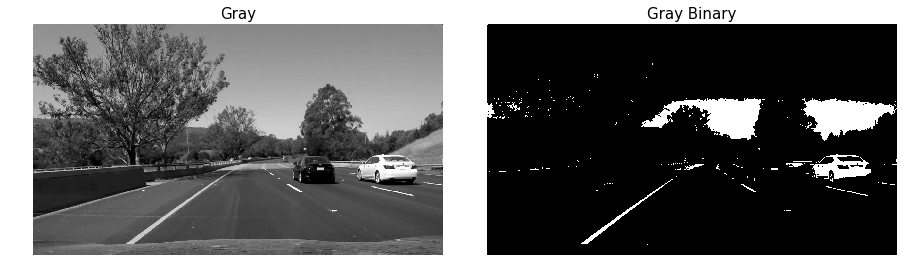

In [5]:

thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

print()
print('threshold values: ', thresh)
plot_2_gray_images(gray, binary, 'Gray', 'Gray Binary')



You might have also explored thresholding individual RGB color channels. You can take a look at them side by side to see which ones do a better job of picking up the lane lines:  


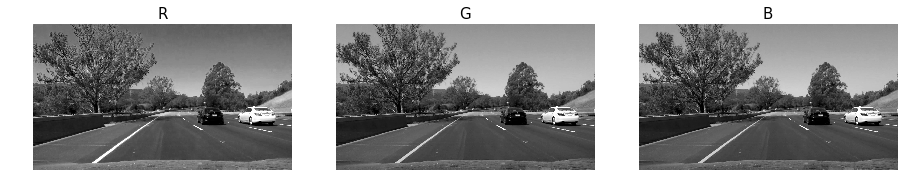

In [6]:

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

print()
plot_3_gray_images(R, G, B, "R", "G", "B")



The R channel does a reasonable job of highlighting the lines, and you can apply a similar threshold to find lane-line pixels:  




Threshold Values:  (200, 255)


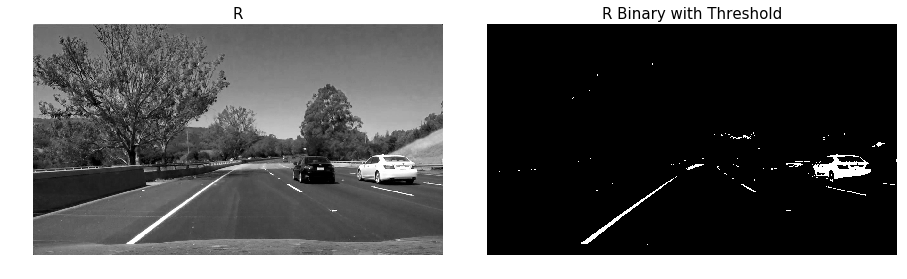

In [7]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

print()
print()
print('Threshold Values: ', thresh)
plot_2_gray_images(R, binary, "R", "R Binary with Threshold")


In this lesson, we're looking at different color spaces.  
While there are several that are worth exploring, here we'll look specifically at **HLS**.  
When we separate the H, L, and S channels we get the following result:


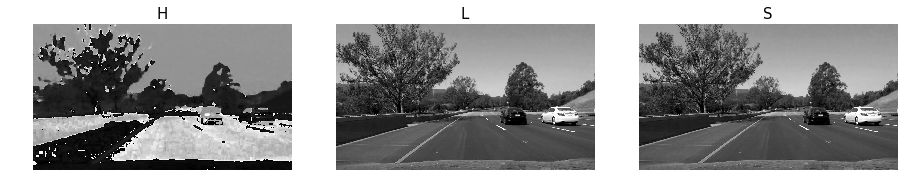

In [8]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

print()
plot_3_gray_images(H, L, S, "H", "L", "S")


The S channel picks up the lines well, so let's try applying a threshold there:



Threshold values:  (90, 255)


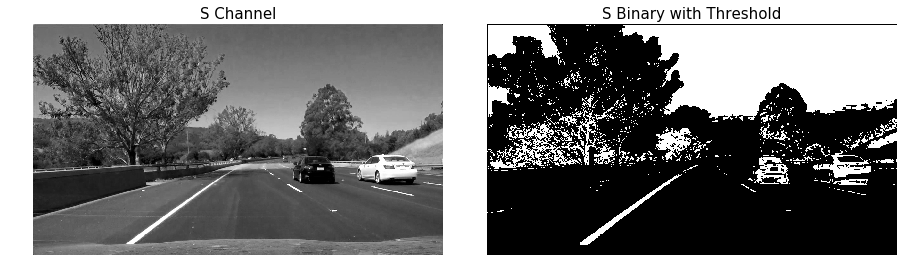

In [9]:

thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

print()
print('Threshold values: ', thresh)
plot_2_gray_images(R, binary, "S Channel", "S Binary with Threshold")



You can also see that in the H channel, the lane lines appear dark, so we could try a low threshold there and obtain the following result:



Threshold Values:  (15, 100)


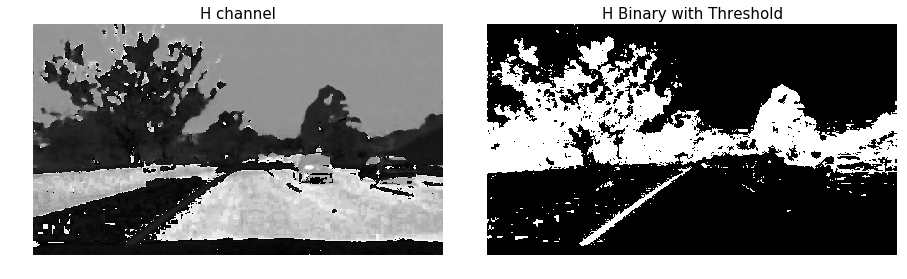

In [10]:

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

print()
print('Threshold Values: ', thresh)
plot_2_gray_images(H, binary, 'H channel', 'H Binary with Threshold')



From these examples, you can see that the **S channel is probably your best bet**.  
It's cleaner than the H channel result and a bit better than the R channel or simple grayscaling.  
But it's not clear that one method is far superior to the others.  

In each case, I've tweaked the threshold parameters to do as good a job as possible of picking out the lines.  
Where we can really see a difference in results, however, is when we step to a new frame, where there are **shadows and different colors in the pavement**.  

Look at the same thresholds applied to these same four channels for this image:  

<img src='l28-test4.jpg' />  

Here's how the various channels and binaries (with the same threshold values as above) look:  



In [11]:
# use this image in the next examples
image = image_shadow_and_color


threshold values:  (180, 255)


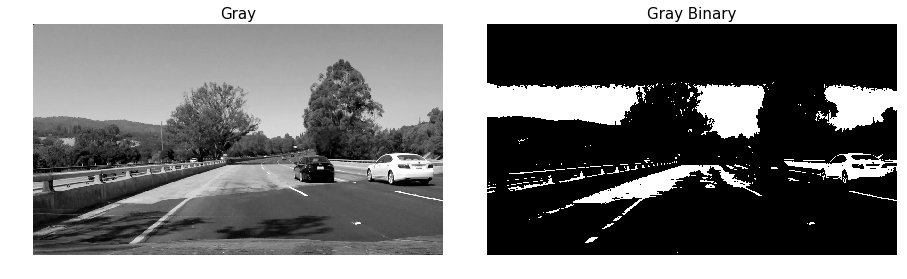

In [12]:

thresh = (180, 255)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
binary = np.zeros_like(gray)
binary[(gray > thresh[0]) & (gray <= thresh[1])] = 1

print()
print('threshold values: ', thresh)
plot_2_gray_images(gray, binary, 'Gray', 'Gray Binary')


In [13]:

R = image[:,:,0]
G = image[:,:,1]
B = image[:,:,2]

# plot_3_gray_images(R, G, B, "R", "G", "B")



Threshold Values:  (200, 255)


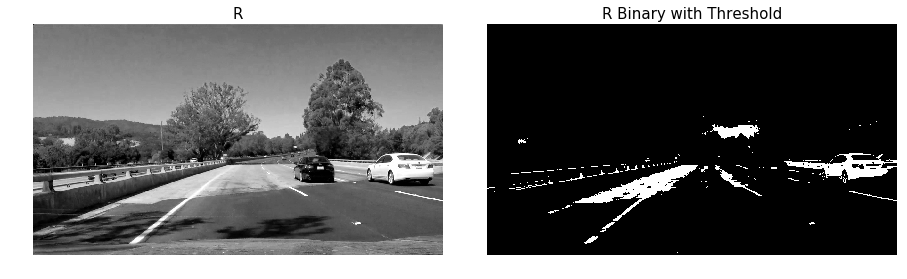

In [14]:
thresh = (200, 255)
binary = np.zeros_like(R)
binary[(R > thresh[0]) & (R <= thresh[1])] = 1

print()
print('Threshold Values: ', thresh)
plot_2_gray_images(R, binary, "R", "R Binary with Threshold")


In [15]:
hls = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
H = hls[:,:,0]
L = hls[:,:,1]
S = hls[:,:,2]

#plot_3_gray_images(H, L, S, "H", "L", "S")



Threshold values:  (90, 255)


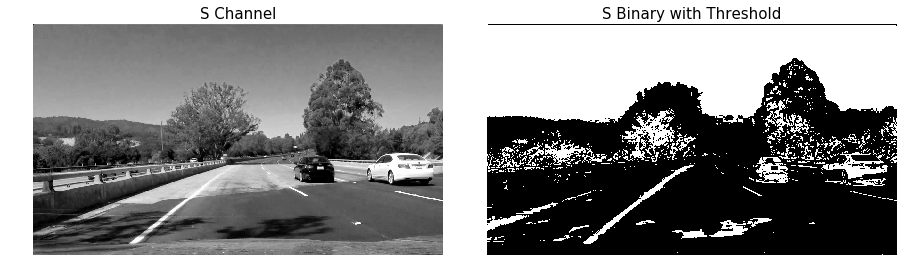

In [16]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1

print()
print('Threshold values: ', thresh)
plot_2_gray_images(R, binary, "S Channel", "S Binary with Threshold")



Threshold Values:  (15, 100)


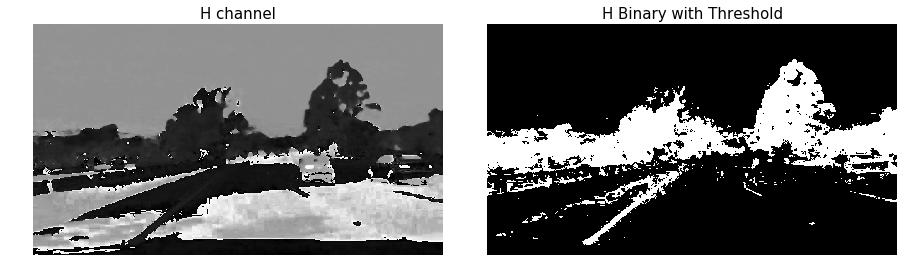

In [17]:

thresh = (15, 100)
binary = np.zeros_like(H)
binary[(H > thresh[0]) & (H <= thresh[1])] = 1

print()
print('Threshold Values: ', thresh)
plot_2_gray_images(H, binary, 'H channel', 'H Binary with Threshold')



Now you can see that, the S channel is still doing a fairly robust job of picking up the lines under very different color and contrast conditions, while the other selections look messy. You could tweak the thresholds and get closer in the other channels, but the S channel is preferable because it is more robust to changing conditions.  

It's worth noting, however, that the R channel still does rather well on the white lines, perhaps even better than the S channel. As with gradients, it's worth considering how you might combine various color thresholds to make the most robust identification of the lines.  

### L_26 Color Thresholding

#### Color Space Notes


#### **HLS** Color Space:

**H** and **S** Channels Stay Fairly **Consistent**  
in **Shadow** or Excessive **Brightness**.  

Isolates the **Lightness (L)** Component, which   
**Varies the Most Under Different Lighting Condid\tions**  



#### A **color space** is a specific organization of colors; color spaces provide a way to categorize colors and represent them in digital images.  

**RGB** is red-green-blue color space. You can think of this as a 3D space, in this case a cube, where any color can be represented by a 3D coordinate of R, G, and B values. For example, white has the coordinate **(255, 255, 255)**, which has the maximum value for red, green, and blue.  

***Note***: If you read in an image using `matplotlib.image.imread()` you will get an **RGB** image, but if you read it in using OpenCV `cv2.imread()` this will give you a **BGR** image.  
RGB color space  
<img src='l26-rgb-color-cube.png' />  
RGB color space  

There are many other ways to represent the colors in an image besides just composed of red, green, and blue values.  

There is also **HSV** color space (hue, saturation, and value), and **HLS** space (hue, lightness, and saturation). These are some of the **most common**ly used color spaces **in image analysis**.  

To get some intuition about these color spaces, you can generally think of **Hue** as the value that represents color independent of any change in brightness. So if you imagine a basic red paint color, then add some white to it or some black to make that color lighter or darker -- the underlying color remains the same and the hue for all of these colors will be the same.  

On the other hand, **Lightness** and **Value** represent different ways to measure the relative lightness or darkness of a color. For example, a dark red will have a similar hue but much lower value for lightness than a light red.  
**Saturation** also plays a part in this; saturation is a measurement of colorfulness. So, *as colors get lighter and closer to white, they have a lower saturation value*, whereas colors that are the most intense, like a bright primary color (imagine a bright red, blue, or yellow), have a high saturation value. You can get a better idea of these values by looking at the 3D color spaces pictured below.  

(Left) HSV color space, (Right) HLS color space    
<img src='l26-hsv-hls-color-cylinders.png' />
(Left) HSV color space, (Right) HLS color space  

Most of these different color spaces were either inspired by the human vision system, and/or developed for efficient use in television screen displays and computer graphics. You can read more about the <a href="https://en.wikipedia.org/wiki/HSL_and_HSV"> history </a> and the derivation of HLS and HSV color spaces here.  

In the code example, I used HLS space to help detect lane lines of different colors and under different lighting conditions.  

OpenCV provides a function **<a href="http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor">```hls = cv2.cvtColor(im, cv2.COLOR_RGB2HLS)```</a > ** that converts images from one color space to another. If you’re interested in the math behind this conversion, take a look at the equations below; note that all this math is for converting 8-bit images, which is the format for most road images in this course. These equations convert one color at a time from RGB to HLS.  

#### **Constants **

\begin{equation*}
V​max​​ ←max(R,G,B)
\end{equation*}  
\begin{equation*}
V​min​​ ←min(R,G,B)
\end{equation*}  
These are the maximum and minimum values across all three RGB values for a given color.  

#### **H channel conversion equations**  

There are three different equations.  
Which one is used depends on whether the the value of  
**$V​max​​  $**  is R, G, or B.  

\begin{equation*}
H←  ​​​​​0 ​+​ \frac{​​30(G−B)​​}{Vmax−Vmin}  ​​, if V​max​​ = R
\end{equation*}

\begin{equation*}
H← ​​​60 ​+​ \frac{​​30(B−R)​​}{Vmax−Vmin}  ​​, if V​max​​ = G
\end{equation*}

\begin{equation*}
H←120 ​+​ \frac{​​30(R−G)​​}{Vmax−Vmin}  ​​, if V​max​​ = B
\end{equation*}

***Note***: In **OpenCV**, for **8-bit images**, the range of **H** is from **0-179**.  
It's typically from 0-359 for degrees around the cylindrical colorspace,  
but this number is divided in half so that the range can be represented in an 8-bit image,  
whose color values range from 0-255.  

#### **L channel conversion equation** 

\begin{equation*}
L←​​\frac{Vmax+Vmin}{2}​​ 
\end{equation*}

#### **S channel conversion equations ** 

There are two possible equations; one is used depending on the value of $L$.  

\begin{equation*}  
S←​​​\frac{​​​​​​Vmax−Vmin}{​​​​​​​​Vmax+Vmin} ​​​​​​​​​,​​ if L < 0.5
\end{equation*}  

\begin{equation*}  
S←​​\frac{Vmax−Vmin}{​2−(Vmax+Vmin)} ​​,​​ if L ≥ 0.5 
\end{equation*}
